In [1]:
from datetime import datetime
import gym
from gym.wrappers import Monitor
import gym_ple
import matplotlib.pyplot as plt

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
couldn't import doomish
Couldn't import doom


In [3]:
# Create a random agent
class RandomAgent(object):
    def __init__(self, action_space):
        self.action_space = action_space

    def act(self, observation, reward, done):
        return self.action_space.sample()

Action space is: Discrete(2)
Finished episode 1. Episode reward: -5.0


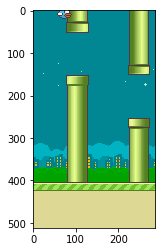

In [8]:
env = gym.make('FlappyBird-v0')
#record each episode in a video file
env = Monitor(env, "./vid", video_callable=lambda episode_id: True, force=True)

print("Action space is: {}".format(env.action_space))

agent = RandomAgent(env.action_space)

episode_count = 1
reward = 0
done = False

for i in range(episode_count):
    ob = env.reset()
    episode_reward = 0
    
    while True:
        action = agent.act(ob, reward, done)
        plt.imshow(ob)
        ob, reward, done, _ = env.step(action)
        episode_reward += reward
        if done:
            print("Finished episode {}. Episode reward: {}". format(i+1, episode_reward))
            break
            

env.close()


In [5]:
import glob, io, base64
from IPython.display import HTML
import random

# obtain all videos 
videos = [v for v in glob.glob("vid/*.mp4")]

#display random episode
video_path = random.choice(videos)
video = io.open(video_path, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<video alt="test" controls>
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii')))

(512, 288, 3)


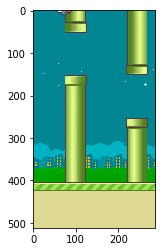

In [10]:
obs = env.reset()
plt.imshow(obs)
print(obs.shape)

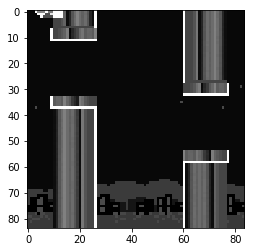

In [49]:
from image_transformer import ImageTransformer
import tensorflow as tf

transformer = ImageTransformer(crop_boundaries=(0, 50, 400, 238))
img = transformer.transform(obs, tf.Session())
plt.imshow(img, cmap='gray')
